In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [3]:
#with open("../ressources/final_experiments/automode_datasets/df_increasing_size_3000.pickle", "rb") as file:
#with open("../ressources/final_experiments/automode_datasets/df_increasing_size_validate.pickle", "rb") as file:
#with open("../ressources/final_experiments/result_increasing_size_exp/llm_evaluated_1575.pickle", "rb") as file:
#with open("../ressources/final_experiments/result_leaveoneout_exp/llm_evaluated_agg.pickle", "rb") as file:
#with open("../ressources/final_experiments/result_dpo_exp/llm_dpo_rl_evaluated_v5.pickle", "rb") as file:
with open("../ressources/final_experiments/result_formal_descriptions_exp/llm_evaluated_bt_descriptions.pickle", "rb") as file:
#with open("../ressources/automode_bt_evaluated.pickle", "rb") as file:
    original_df = pickle.load(file)

In [4]:
original_df[original_df.type == "Distribution"]["avg_score"].min()

np.float64(-29.58218)

In [5]:
original_df["type"] = original_df["parameters"].map(lambda x: type(x.objective_params).__name__)
original_df["original_index"] = original_df.index
original_df["z-scores"] = original_df["scores"].map(lambda x: (x - np.mean(x)) / np.std(x) if x is not None else None)
original_df["coeff_of_var"] = original_df["scores"].map(lambda x: x+abs(np.min(x)) + 1 if x is not None else None).map(lambda x: np.std(x)/np.mean(x) if x is not None else None)


/tmp/ipykernel_29549/3181682175.py:3: RuntimeWarning: invalid value encountered in divide
  original_df["z-scores"] = original_df["scores"].map(lambda x: (x - np.mean(x)) / np.std(x) if x is not None else None)


In [6]:
group_dfs = {category: group.reset_index(drop=True) for category, group in original_df.groupby("type")}

for group, df in group_dfs.items():
    old_size = len(df)
    cleaned = df.dropna()
    new_size = len(cleaned)
    print(f" {group}:  {old_size=} {new_size=}: ratio: {new_size/float(old_size)}")
    group_dfs[group] = cleaned

 Aggregation:  old_size=60 new_size=60: ratio: 1.0
 Connection:  old_size=71 new_size=71: ratio: 1.0
 Distribution:  old_size=44 new_size=44: ratio: 1.0
 Foraging:  old_size=75 new_size=75: ratio: 1.0


In [7]:
group_dfs["Aggregation"]

,description,configuration,parameters,argos,behavior_tree,scores,avg_score,type,lightstype,arenatype,robotstype,llm_scores,llm_behavior_tree,llm_avg_score,original_index,z-scores,coeff_of_var
0,The arena has a radius of 1.99 m. In this sett...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.8, 0.866667, 0.733333, 0.8, 0.866667, 0.6, ...",0.740000,Aggregation,UniformLights,CircularArena,CenteredSwarm,"[0.266667, 0.466667, 0.333333, 0.466667, 0.466...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.340000,3,"[0.6923063950813656, 1.4615408511536148, -0.07...",0.037037
1,The area is a rectangle with dimensions 6.56 x...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.333333, 0.0833333, 0.166667, 0.0833333, 0.0...",0.150000,Aggregation,UniformLights,RectangularArena,CenteredSwarm,"[0.0833333, 0.0, 0.0833333, 0.0833333, 0.08333...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.150000,5,"[1.5714270058275857, -0.571429209912257, 0.142...",0.101449
2,The environment consists of a rectangular area...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.4, 0.6, 0.6, 0.6, 1.0, 1.0, 0.6, 0.6, 0.6, ...",0.660000,Aggregation,UniformLights,RectangularArena,CenteredSwarm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.000000,6,"[-1.444444444444444, -0.33333333333333304, -0....",0.087379
3,The environment consists of a circular arena w...,"<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 --...,"[0.0625, 0.125, 0.0625, 0.125, 0.1875, 0.125, ...",0.112500,Aggregation,UniformLights,CircularArena,CenteredSwarm,"[0.0625, 0.0, 0.0625, 0.0, 0.0625, 0.0, 0.0625...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.043750,9,"[-1.3333333333333333, 0.3333333333333332, -1.3...",0.031915
4,"The rectangular space is 1.94 m long, 2.32 m w...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,Aggregation,UniformLights,RectangularArena,CenteredSwarm,"[0.333333, 0.555556, 0.222222, 0.222222, 0.111...",--nroot 3 --nchildroot 2 --n0 0 --nchild0 2 -...,0.300000,13,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",0.000000
5,"With a length of 6.99 meters, width of 7.46 me...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=RectangularArena(le...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 --...,"[0.888889, 0.888889, 0.888889, 0.777778, 0.777...",0.855556,Aggregation,TargetLights,RectangularArena,CenteredSwarm,"[0.555556, 0.555556, 0.555556, 0.555556, 0.666...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.600000,20,"[0.654653670707977, 0.654653670707977, 0.65465...",0.019336
6,"In this setting, a circular arena with a radiu...","<?xml version=""1.00"" ?>\n<config>\n <swarm-el...",MissionParams(arena_params=CircularArena(radiu...,"<?xml version=""1.00"" ?>\n<argos-configuration>...",--nroot 3 --nchildroot 4 --n0 0 --nchild0 2 --...,"[0.153846, 0.461538, 0.230769, 0.384615, 0.538...",0.376923,Aggregation,TargetLights,CircularArena,CenteredSwarm,"[0.769231, 0.615385, 0.538462, 0.538462, 0.538...",--nroot 3 --nchildroot 3 --n0 0 --nchild0 2 -...,0.553846,28,"[-1.59882053467699, 

In [8]:
try:
    print(group_dfs["Foraging"][group_dfs["Foraging"]["avg_score"] > 4000].iloc[0].behavior_tree)
except:
    print("not found")

not found


## Distribution of Scores

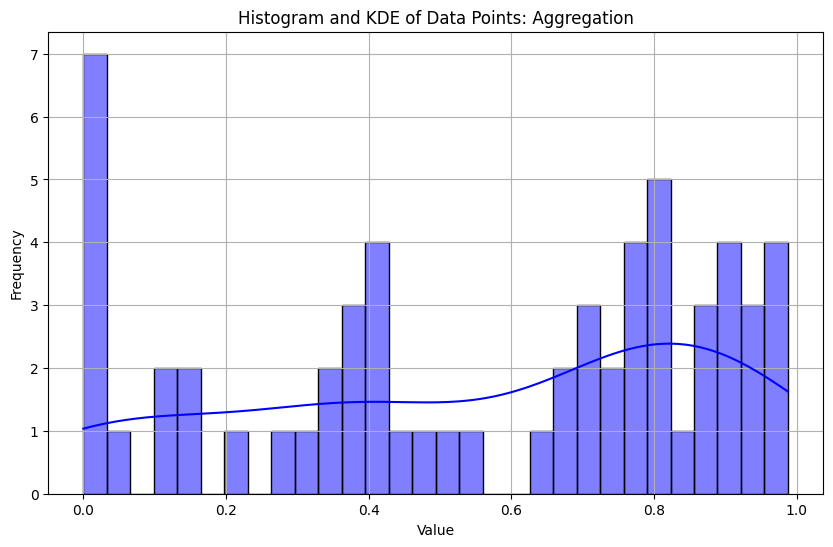

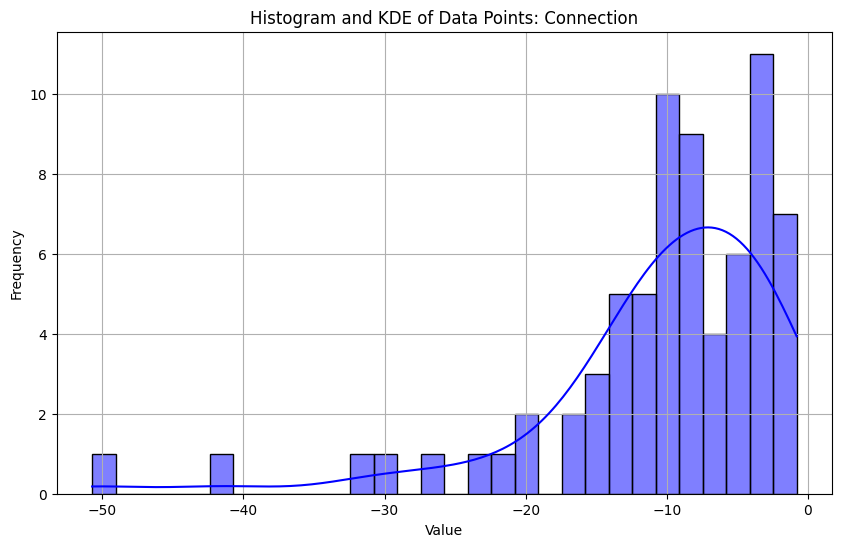

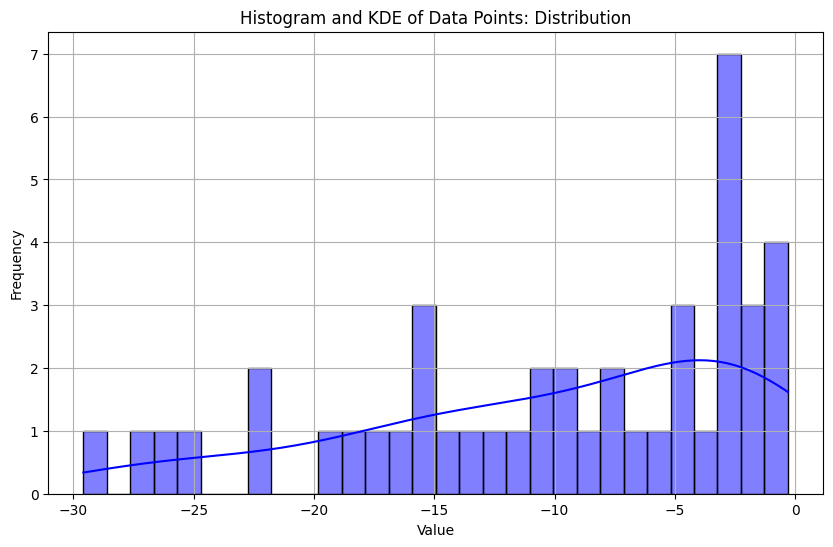

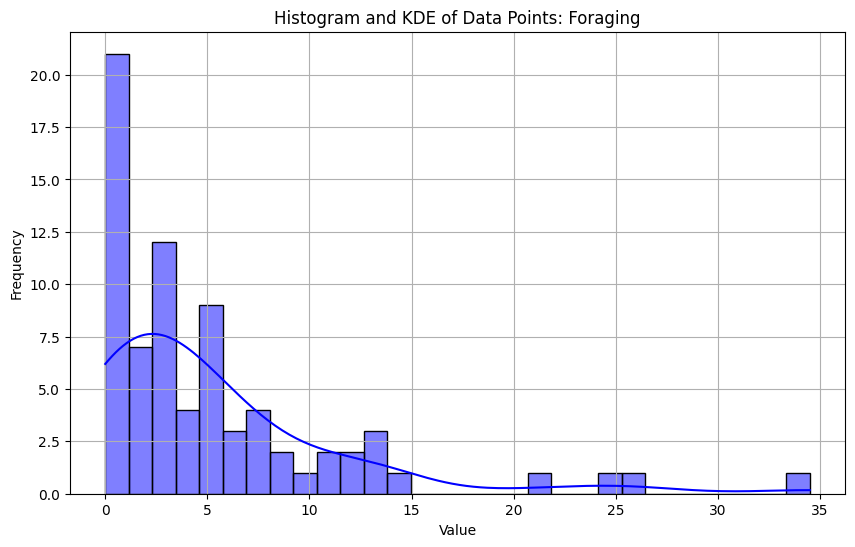

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for group, df in group_dfs.items():
    # Sample data
    data = df.avg_score.to_numpy()

    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=30, kde=True, color='blue', alpha=0.5)
    plt.title(f"Histogram and KDE of Data Points: {group}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()


In [10]:
import plotly.express as px
import numpy as np

# Sample data
data = group_dfs["Aggregation"].avg_score.to_numpy()

# Create a KDE plot
# fig = px.density_contour(x=data, title='KDE Plot of Data Points', labels={'x': 'Value'})
# fig.update_layout(xaxis_title='Value', yaxis_title='Density')
# fig.show()

# Create a histogram
fig = px.histogram(data, nbins=30, title='Histogram of Data Points', labels={'value': 'Value'})
fig.update_layout(xaxis_title='Value', yaxis_title='Frequency')
fig.show()


## Coefficient of Variation Analysis

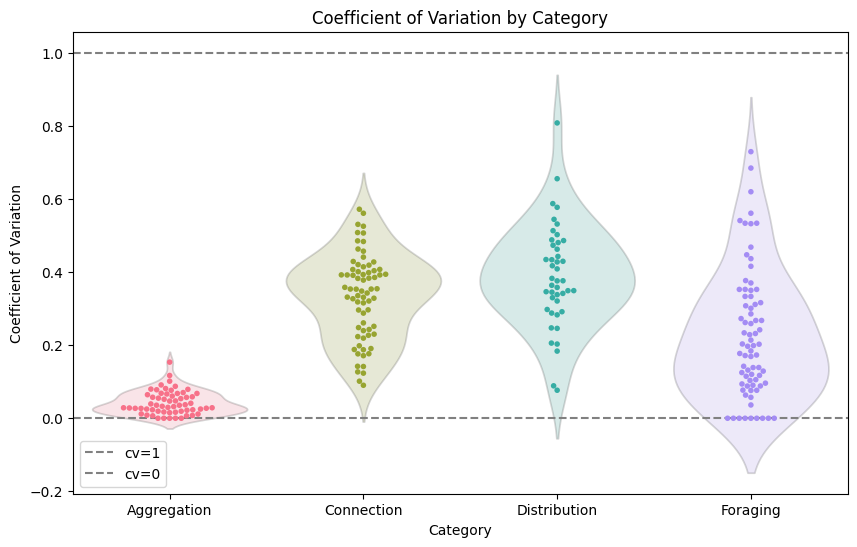

In [11]:
combined_df = pd.concat(
    [df.assign(category=category) for category, df in group_dfs.items()],
    ignore_index=True
)

plt.figure(figsize=(10, 6))

# Define a color palette for the categories
palette = sns.color_palette("husl", n_colors=len(combined_df['category'].unique()))

# Use violinplot to show the distribution of the data with colors
sns.violinplot(data=combined_df, x='category', y='coeff_of_var', inner=None, palette=palette, alpha=0.21, hue='category')

# Overlay swarm plot to scatter individual points with colors
sns.swarmplot(data=combined_df, x='category', y='coeff_of_var', alpha=1.0, size=4, hue='category', palette=palette)

# Add a horizontal line at y=1 (solid and black)
plt.axhline(y=1, color='grey', linestyle='--', label='cv=1')
plt.axhline(y=0, color='grey', linestyle='--', label='cv=0')

# Step 4: Customize the plot
plt.title('Coefficient of Variation by Category')
plt.xlabel('Category')
plt.ylabel('Coefficient of Variation')
plt.legend()  # Show legend for the horizontal line
plt.show()

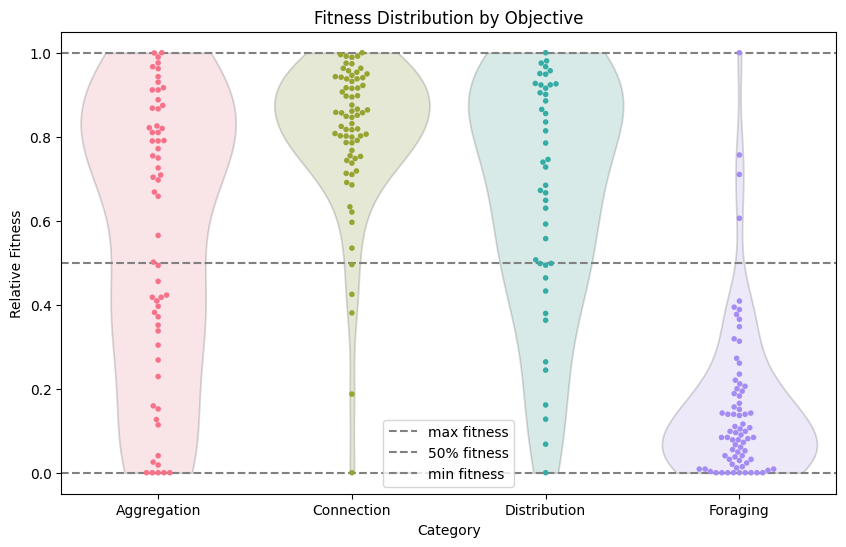

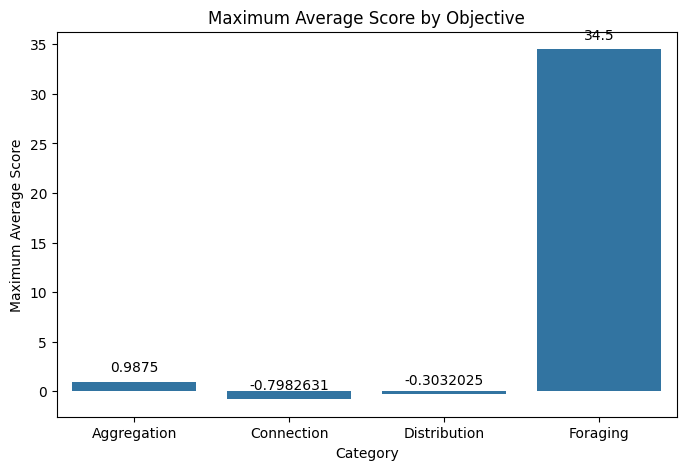

In [12]:
# Step 1: Calculate the max and min avg_score for each category
min_max_values = combined_df.groupby("category")["avg_score"].agg(['min', 'max']).reset_index()

# Step 2: Merge the min and max values back to the original DataFrame
combined_df_scaled = combined_df.merge(min_max_values, on="category")

# Step 3: Scale the avg_score to the range [0, 1]
combined_df_scaled['scaled_avg_score'] = (combined_df_scaled['avg_score'] - combined_df_scaled['min']) / (combined_df_scaled['max'] - combined_df_scaled['min'])

plt.figure(figsize=(10, 6))

# Define a color palette for the categories
palette = sns.color_palette("husl", n_colors=len(combined_df_scaled['category'].unique()))

# Use violinplot to show the distribution of the data with colors
sns.violinplot(data=combined_df_scaled, x='category', y='scaled_avg_score', inner=None, palette=palette, alpha=0.21, hue='category', cut=0)

# Overlay swarm plot to scatter individual points with colors
sns.swarmplot(data=combined_df_scaled, x='category', y='scaled_avg_score', alpha=1.0, size=4, hue='category', palette=palette)

# Add a horizontal line at y=1 (solid and black)
plt.axhline(y=1, color='grey', linestyle='--', label='max fitness')
plt.axhline(y=0.5, color='grey', linestyle='--', label='50% fitness')
plt.axhline(y=0, color='grey', linestyle='--', label='min fitness')

# Step 4: Customize the plot
plt.title('Fitness Distribution by Objective')
plt.xlabel('Category')
plt.ylabel('Relative Fitness')
plt.legend()  # Show legend for the horizontal line
plt.show()

# Step 1: Calculate the maximum avg_score for each category
max_values = combined_df_scaled.groupby("category")["avg_score"].max().reset_index()
max_values.rename(columns={"avg_score": "max_avg_score"}, inplace=True)

# Step 2: Create a bar plot using Seaborn
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(data=max_values, x='category', y='max_avg_score', legend=False)

# Adding titles and labels
plt.title('Maximum Average Score by Objective')
plt.xlabel('Category')
plt.ylabel('Maximum Average Score')

# Step 3: Annotate the bars with their respective values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=10, color='black', 
                      xytext=(0, 5),  # Offset text
                      textcoords='offset points')

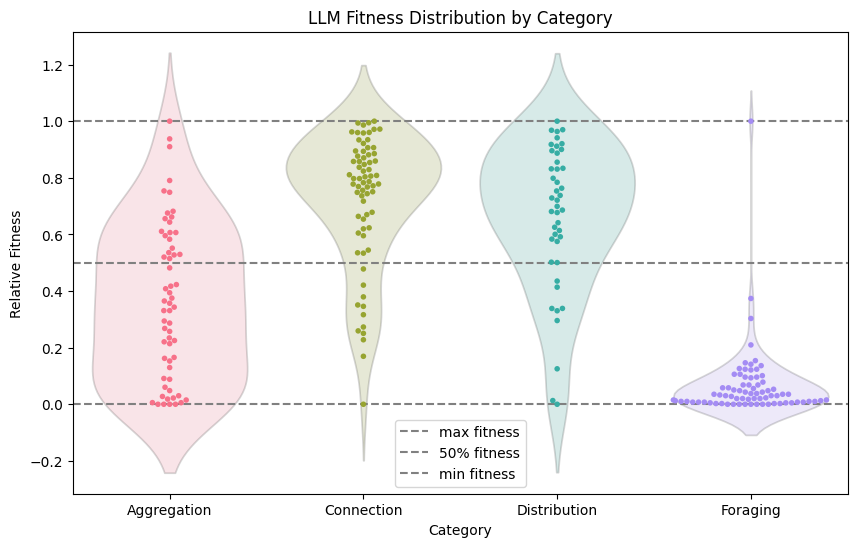

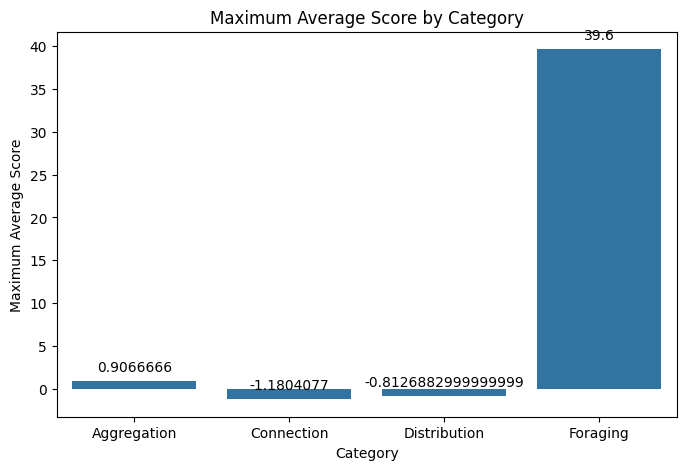

In [13]:
if "llm_avg_score" in combined_df.keys():
    scoreidx = "llm_avg_score"
    # Step 1: Calculate the max and min avg_score for each category
    min_max_values = combined_df.groupby("category")[scoreidx].agg(['min', 'max']).reset_index()

    # Step 2: Merge the min and max values back to the original DataFrame
    combined_df_scaled = combined_df.merge(min_max_values, on="category")

    # Step 3: Scale the avg_score to the range [0, 1]
    combined_df_scaled['scaled_avg_score'] = (combined_df_scaled[scoreidx] - combined_df_scaled['min']) / (combined_df_scaled['max'] - combined_df_scaled['min'])

    plt.figure(figsize=(10, 6))

    # Define a color palette for the categories
    palette = sns.color_palette("husl", n_colors=len(combined_df_scaled['category'].unique()))

    # Use violinplot to show the distribution of the data with colors
    sns.violinplot(data=combined_df_scaled, x='category', y='scaled_avg_score', inner=None, palette=palette, alpha=0.21, hue='category')

    # Overlay swarm plot to scatter individual points with colors
    sns.swarmplot(data=combined_df_scaled, x='category', y='scaled_avg_score', alpha=1.0, size=4, hue='category', palette=palette)

    # Add a horizontal line at y=1 (solid and black)
    plt.axhline(y=1, color='grey', linestyle='--', label='max fitness')
    plt.axhline(y=0.5, color='grey', linestyle='--', label='50% fitness')
    plt.axhline(y=0, color='grey', linestyle='--', label='min fitness')

    # Step 4: Customize the plot
    plt.title('LLM Fitness Distribution by Category')
    plt.xlabel('Category')
    plt.ylabel('Relative Fitness')
    plt.legend()  # Show legend for the horizontal line
    plt.show()

    # Step 1: Calculate the maximum avg_score for each category
    max_values = combined_df_scaled.groupby("category")[scoreidx].max().reset_index()
    max_values.rename(columns={scoreidx: "max_avg_score"}, inplace=True)

    # Step 2: Create a bar plot using Seaborn
    plt.figure(figsize=(8, 5))
    bar_plot = sns.barplot(data=max_values, x='category', y='max_avg_score', legend=False)

    # Adding titles and labels
    plt.title('Maximum Average Score by Category')
    plt.xlabel('Category')
    plt.ylabel('Maximum Average Score')

    # Step 3: Annotate the bars with their respective values
    for p in bar_plot.patches:
        bar_plot.annotate(f'{p.get_height()}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', 
                        xytext=(0, 5),  # Offset text
                        textcoords='offset points')

In [14]:
topn = 25
for group, df in group_dfs.items():
    sorted_df = df.sort_values(by="avg_score", ascending=False)
    for index, row in sorted_df.head(topn).iterrows():
        print(group, "\t",f"{row.original_index:04}", f"{row.avg_score:07.2f}")

Aggregation 	 0074 0000.99
Aggregation 	 0190 0000.99
Aggregation 	 0061 0000.98
Aggregation 	 0082 0000.96
Aggregation 	 0217 0000.95
Aggregation 	 0243 0000.95
Aggregation 	 0144 0000.93
Aggregation 	 0153 0000.92
Aggregation 	 0039 0000.91
Aggregation 	 0108 0000.90
Aggregation 	 0075 0000.90
Aggregation 	 0055 0000.88
Aggregation 	 0045 0000.86
Aggregation 	 0120 0000.86
Aggregation 	 0020 0000.86
Aggregation 	 0235 0000.82
Aggregation 	 0032 0000.81
Aggregation 	 0116 0000.81
Aggregation 	 0132 0000.80
Aggregation 	 0233 0000.80
Aggregation 	 0031 0000.78
Aggregation 	 0041 0000.78
Aggregation 	 0049 0000.78
Aggregation 	 0119 0000.76
Aggregation 	 0064 0000.74
Connection 	 0199 -000.80
Connection 	 0240 -001.03
Connection 	 0033 -001.20
Connection 	 0122 -001.21
Connection 	 0105 -001.34
Connection 	 0203 -002.04
Connection 	 0087 -002.11
Connection 	 0130 -002.64
Connection 	 0178 -002.65
Connection 	 0155 -002.94
Connection 	 0097 -003.12
Connection 	 0212 -003.32
Connection 	 

In [15]:
topn = 50
for group, df in group_dfs.items():
    sorted_df = df.sort_values(by="llm_avg_score", ascending=False)
    for index, row in sorted_df.head(topn).iterrows():
        print(group, "\t",f"{row.original_index:04}", f"{row.llm_avg_score:07.2f}")

Aggregation 	 0075 0000.91
Aggregation 	 0061 0000.85
Aggregation 	 0144 0000.82
Aggregation 	 0243 0000.72
Aggregation 	 0108 0000.68
Aggregation 	 0077 0000.68
Aggregation 	 0153 0000.62
Aggregation 	 0074 0000.61
Aggregation 	 0020 0000.60
Aggregation 	 0201 0000.59
Aggregation 	 0208 0000.58
Aggregation 	 0028 0000.55
Aggregation 	 0064 0000.55
Aggregation 	 0165 0000.55
Aggregation 	 0041 0000.54
Aggregation 	 0100 0000.53
Aggregation 	 0045 0000.50
Aggregation 	 0116 0000.49
Aggregation 	 0218 0000.48
Aggregation 	 0190 0000.48
Aggregation 	 0044 0000.47
Aggregation 	 0115 0000.47
Aggregation 	 0039 0000.44
Aggregation 	 0111 0000.38
Aggregation 	 0043 0000.38
Aggregation 	 0187 0000.37
Aggregation 	 0119 0000.36
Aggregation 	 0003 0000.34
Aggregation 	 0055 0000.33
Aggregation 	 0140 0000.32
Aggregation 	 0032 0000.31
Aggregation 	 0054 0000.30
Aggregation 	 0013 0000.30
Aggregation 	 0132 0000.27
Aggregation 	 0049 0000.26
Aggregation 	 0120 0000.24
Aggregation 	 0031 0000.23
A

In [16]:
df.original_index

0       0
1       1
2       4
3       7
4       8
     ... 
70    239
71    244
72    245
73    246
74    249
Name: original_index, Length: 75, dtype: int64

In [17]:
# for line in df[][0].argos.split("\n"):
#     if "objective" in line:
#         print(line)

In [18]:
(df.original_index == 3).any()

np.False_